# MODELO PREDICTIVO - LA RUTA DEL DINERO - PREPARACIÓN DE DATOS

## 1. Importar librerías

In [1]:
# 1. Importar librerías
import pandas as pd
import numpy as np
import scipy as sc
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sn
import bokeh as bk

## 2. Cargar la data

In [2]:
# 2. Leer la data
tablon_subs = pd.read_excel('Tablon_subs.xlsx')
# Dar formato a las columnas
tablon_subs.columns = tablon_subs.columns.str.split('.').str[1] +'|' + np.arange(tablon_subs.columns.size).astype(np.str)
# Mostrar los 5 primeros datosñ
tablon_subs.head()

,libr_tribu|0,valor_fob|1,valor_seguro|2,valor_flete|3,cfr|4,cif|5,num_aduanas|6,num_declac|7,num_regim_aduan|8,num_manifiestos|9,...,departamento|88,provincia|89,distrito|90,act_principal|91,numero_de_operaciones|92,num_meses_transferencias|93,promedio_mto_base|94,target3|95,numero_operaciones_internacionales|96,monto_base_itf_internac|97
0,10094250400,1023188.650,22969.244,15790.000,1038978.650,1061947.894,1,13,3,13,...,LIMA,LIMA,LA VICTORIA,"VTA. MIN. PRODUCTOS TEXTILES, CALZADO.",1,1,1.00000,0,NaN,NaN
1,10097261542,105688.000,792.660,9455.000,115143.000,115935.660,1,1,1,1,...,LIMA,LIMA,BARRANCO,ACTIVIDADES INMOBILIARIAS,1,1,1.00000,0,NaN,NaN
2,10101281359,2392962.133,61787.578,237893.555,2630855.688,2692643.266,2,170,7,93,...,LIMA,LIMA,LIMA,VTA. MAY. DE OTROS PRODUCTOS.,1,1,99796.72044,2,NaN,NaN
3,10102700827,325894.280,3333.398,30217.636,356111.916,359445.314,1,18,4,18,...,LIMA,LIMA,SANTA ANITA,OTRAS ACTIVIDADES EMPRESARIALES NCP.,1,1,1.00000,1,NaN,NaN
4,10102840696,30213.030,231.589,1845.200,32058.230,32289.819,1,3,3,3,...,LIMA,LIMA,MIRAFLORES,PRODUCCION Y DIST.FILMES Y VIDEOS,1,1,1.00000,0,NaN,NaN


In [3]:
tablon_subs.columns

Index(['libr_tribu|0', 'valor_fob|1', 'valor_seguro|2', 'valor_flete|3',
       'cfr|4', 'cif|5', 'num_aduanas|6', 'num_declac|7', 'num_regim_aduan|8',
       'num_manifiestos|9', 'num_formas_pago_dua|10', 'num_almacen|11',
       'sum_peso_neto|12', 'sum_peso_bruto|13', 'num_series|14',
       'num_bancos_cancel_dua|15', 'num_bultos|16', 'num_unidades_fisicas|17',
       'num_unidades_comerciales|18', 'libr_tribu|19', 'num_transacciones|20',
       'num_transac_nac|21', 'num_transac_int|22', 'num_entid_invol|23',
       'num_pais_origen|24', 'num_pais_destino|25', 'prop_transac_nac|26',
       'prop_transac_int|27', 'prom_transacxent|28', 'ord_ruc|29',
       'num_proveedores|30', 'num_dams|31', 'ad_valorem|32', 'fob|33',
       'rango_usd_inf|34', 'rango_usd_sup|35', 'marca_clase|36',
       'diferencia|37', 'proporcion|38', 'fob_total|39', 'dam_t|40',
       'rangos_proporcion|41', 'rango_usd_inf_t|42', 'rango_usd_sup_t|43',
       'marca_clase_t|44', 'num_transac_t|45', 'ruc|46', '

In [4]:
# Selección de variables
tablon_subs1 = tablon_subs[['ruc|77','razon_social|78', 'num_transacciones|20',
       'num_transac_nac|21', 'num_transac_int|22', 'num_entid_invol|23',
       'num_pais_origen|24', 'num_pais_destino|25', 'prop_transac_nac|26',
       'prop_transac_int|27', 'prom_transacxent|28', 'num_proveedores|30', 'num_dams|31', 'ad_valorem|32', 'fob|33',
       'rango_usd_inf|34', 'rango_usd_sup|35', 'marca_clase|36',
       'diferencia|37', 'proporcion|38', 'fob_total|39', 'dam_t|40',
       'rangos_proporcion|41', 'rango_usd_inf_t|42', 'rango_usd_sup_t|43',
       'marca_clase_t|44', 'num_transac_t|45','num_vinculados|64', 'num_vinculos|65',
       'num_trabajadores|66', 'num_socios|67', 'representantes|68','ventas_promedio|70', 'compras_promedio|71',
       'com_ventas|72', 'ventas_acumuladas|73', 'compras_acumuladas|74',
       'ind_cv|75', 'cas_409|76','condicion|79',
       'estado|80', 'tipo_emp|81', 'tamano|82', 'ind_buencont|83',
       'contabilidad|84', 'facturacion|85', 'comercio_ext|86', 'ubigeo|87',
       'departamento|88', 'provincia|89', 'distrito|90', 'act_principal|91',
       'numero_de_operaciones|92', 'num_meses_transferencias|93',
       'promedio_mto_base|94','numero_operaciones_internacionales|96', 'monto_base_itf_internac|97', 'target3|95', 'target|61', ]]

tablon_subs1.columns = tablon_subs1.columns.str.split('|').str[0]
tablon_subs1.head()

,ruc,razon_social,num_transacciones,num_transac_nac,num_transac_int,num_entid_invol,num_pais_origen,num_pais_destino,prop_transac_nac,prop_transac_int,...,provincia,distrito,act_principal,numero_de_operaciones,num_meses_transferencias,promedio_mto_base,numero_operaciones_internacionales,monto_base_itf_internac,target3,target
0,10094250400,OLIVARES OBISPO EDGARD ABEL ...,102,81,21,3,1,1,79.41,20.59,...,LIMA,LA VICTORIA,"VTA. MIN. PRODUCTOS TEXTILES, CALZADO.",1,1,1.00000,NaN,NaN,0,0
1,10097261542,DE OSMA BERCKEMEYER SANTIAGO GASPAR ...,6,3,3,3,2,3,50.00,50.00,...,LIMA,BARRANCO,ACTIVIDADES INMOBILIARIAS,1,1,1.00000,NaN,NaN,0,0
2,10101281359,DEL AGUILA MESCO YULIANA LIBERTAD ...,109,94,15,6,2,6,86.24,13.76,...,LIMA,LIMA,VTA. MAY. DE OTROS PRODUCTOS.,1,1,99796.72044,NaN,NaN,2,2
3,10102700827,PLASENCIA SALCEDO VANESSA NOEMI ...,24,10,14,1,2,2,41.67,58.33,...,LIMA,SANTA ANITA,OTRAS ACTIVIDADES EMPRESARIALES NCP.,1,1,1.00000,NaN,NaN,1,1
4,10102840696,MAC KAY FULLE RAFAEL ARTURO ...,10,8,2,2,1,2,80.00,20.00,...,LIMA,MIRAFLORES,PRODUCCION Y DIST.FILMES Y VIDEOS,1,1,1.00000,NaN,NaN,0,0


In [23]:
# Data reto anterior
data_modelar_diego = pd.read_csv('input_modelar_Diego.csv')
data_modelar_diego['mepeco'] = np.where(data_modelar_diego.pricos_mepecos == 'MEPECO', 1,0)
data_modelar_diego['prico'] = np.where(data_modelar_diego.pricos_mepecos == 'PRICO', 1,0)
variables1 = np.array(['ruc','mepeco', 'prico', 'ventas_Prom', 'compras_Prom', 'ratio_igvcred_igvdeb_prom', 
                       'I_M_compras', 'I_M_ventas'])
data_modelar_diego = data_modelar_diego[variables1]

data_cluster_diego = pd.read_csv('input_cluster_Diego.csv')
data_cluster_diego = pd.concat([pd.DataFrame(data_cluster_diego['ruc']), data_cluster_diego.iloc[:,0:1]], axis = 1)
#data_cluster_diego['ruc'] = data_cluster_diego['ruc'].astype(np.int64)

data_ant = data_modelar_diego.merge(data_cluster_diego, on='ruc', how = 'left')
data_ant = data_ant.sort_values('ruc')
data_ant = data_ant.drop_duplicates()
data_ant.head()

C:\Users\Alipio\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:2698: DtypeWarning: Columns (12) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,ruc,mepeco,prico,ventas_Prom,compras_Prom,ratio_igvcred_igvdeb_prom,I_M_compras,I_M_ventas,nro_pdt_prom
0,10000023871,1,0,0.000000,0.0,0.000000,0.000000,0.000000,NaN
1,10000232322,1,0,7638.666667,9632.0,1.417347,1.868688,2.682227,NaN
2,10000377398,1,0,0.000000,0.0,0.000000,0.000000,0.000000,NaN
3,10000471726,1,0,0.000000,0.0,0.000000,0.000000,0.000000,NaN
4,10000568843,1,0,0.000000,0.0,0.000000,0.000000,0.000000,NaN


In [24]:
data_rcc = pd.read_excel('data_rcc_final.xlsx')
data_rcc.head()

,ruc,Préstamos,Tarjetas de crédito,meses_act,Pignoraticios,Sobregiros en cuenta corriente,Avances en cuenta corriente,Arrendamiento financiero,Créditos- Comercio exterior,Otros créditos,Factoring,Lease - back
0,10000023871,28591.79,640746.74,431,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,10000377398,14349937.79,343370.45,78,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,10000471726,802.74,0.00,31,1621.3,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,10000568843,130645.18,658576.34,301,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,10000766742,0.00,1266834.82,294,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [25]:
print(tablon_subs1.shape, 'Tablón Subs')
print(data_ant.shape, 'Data modelo anterior')
print(data_rcc.shape, 'Data de RCC')

(1443, 59) Tablón Subs
(47911, 9) Data modelo anterior
(33171, 12) Data de RCC


In [26]:
# Unir dataframes
dfs = [tablon_subs1, data_ant, data_rcc]
from functools import reduce
dataset = reduce(lambda left,right: pd.merge(left,right,on='ruc', how = 'left'), dfs)
dataset = dataset.sort_values('ruc')
dataset = dataset.drop_duplicates('ruc')
dataset.shape

(1443, 78)

In [27]:
# Porcentjes de ceros
c = pd.DataFrame(round((dataset == 0).sum()/dataset.shape[0]*100,2))
#c.to_excel('ceros.xlsx')

In [34]:
dataset1= dataset[['ruc','num_entid_invol','num_trabajadores','prop_transac_nac','prop_transac_int','prom_transacxent','num_proveedores',
                   'num_dams','num_vinculados','num_vinculos','ventas_promedio','compras_promedio','com_ventas','cas_409',
                   'condicion','estado','tipo_emp','tamano','ind_buencont','comercio_ext','departamento','act_principal',
                   'numero_de_operaciones','num_meses_transferencias','promedio_mto_base','mepeco','compras_Prom',
                   'prico', 'numero_operaciones_internacionales','monto_base_itf_internac', 'Arrendamiento financiero', 'target3','target']]

In [40]:
varf = np.array(['num_trabajadores', 'compras_Prom', 
                 'Arrendamiento financiero', 'monto_base_itf_internac'])

num_trabajadores              9
compras_Prom                  0
Arrendamiento financiero    251
monto_base_itf_internac       6
dtype: int64

## MODELADO DE LA DATA

In [43]:
import warnings
warnings.filterwarnings("ignore")
# Dividir la data en predictoras y target
dataf = dataset1
dataf = dataf.fillna(0)
from sklearn.preprocessing import MinMaxScaler, StandardScaler, RobustScaler, Normalizer
X1 = dataf[varf]

#v_imp = np.array(['prom_transacxent', 'num_proveedores', 'num_pais_destino'])
#X1 = dataf[v_imp]
sc = Normalizer()
sc.fit(X1)
X = pd.DataFrame(sc.transform(X1), columns=X1.columns).values
X 

y = dataset1['target'].values

# Dividir la data en entrenamiento y prueba
from sklearn.cross_validation import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y , test_size = 0.3, random_state = 29)

a= [X_train, X_test]
for i in a:
    print(i.shape)


(1010, 4)
(433, 4)


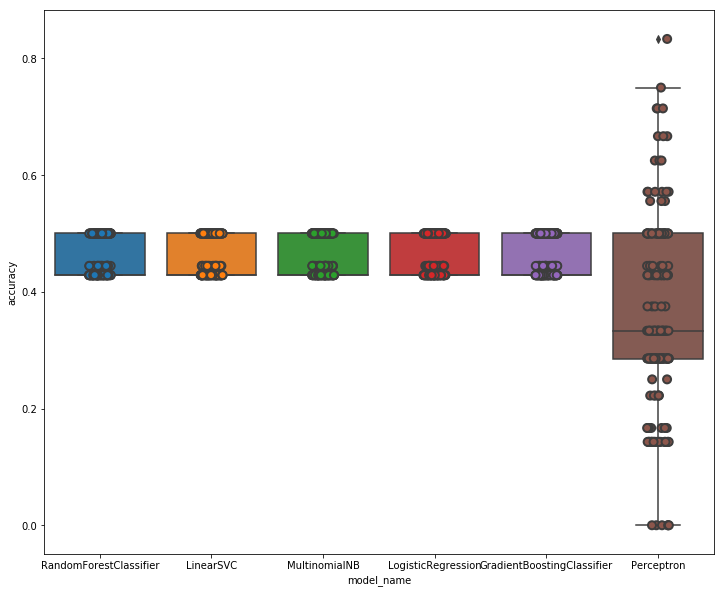

model_name
GradientBoostingClassifier    0.456468
LinearSVC                     0.456468
LogisticRegression            0.456468
MultinomialNB                 0.456468
Perceptron                    0.356389
RandomForestClassifier        0.456468
Name: accuracy, dtype: float64


In [44]:
import warnings
warnings.filterwarnings("ignore")

from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import LinearSVC
from sklearn import ensemble
from sklearn.linear_model import Perceptron

from sklearn.model_selection import cross_val_score

params = {'n_estimators': 4
          , 'max_depth': 3, 'subsample': 0.6,
          'learning_rate': 0.005, 'min_samples_leaf': 2, 'random_state': 29}

models = [
    RandomForestClassifier(n_estimators=4, max_depth = 1, random_state = 29, min_samples_split=2, min_samples_leaf=17),
    LinearSVC(C=1.0, class_weight=None, dual=True, fit_intercept=True,
     intercept_scaling=1, loss='squared_hinge', max_iter=1000,
     multi_class='ovr', penalty='l2', random_state=None, tol=0.001,
     verbose=0),
    MultinomialNB(),
    LogisticRegression(random_state=0),
    ensemble.GradientBoostingClassifier(**params), 
    Perceptron(n_iter=40, eta0=0.01, random_state=0),
]
CV = 200
cv_df = pd.DataFrame(index=range(CV * len(models)))
entries = []
for model in models:
  model_name = model.__class__.__name__
  accuracies = cross_val_score(model, X, y, scoring='accuracy', cv=CV)
  for fold_idx, accuracy in enumerate(accuracies):
    entries.append((model_name, fold_idx, accuracy))
cv_df = pd.DataFrame(entries, columns=['model_name', 'fold_idx', 'accuracy'])

import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(12,10))
sns.boxplot(x='model_name', y='accuracy', data=cv_df)
sns.stripplot(x='model_name', y='accuracy', data=cv_df, 
              size=8, jitter=True, edgecolor="gray", linewidth=2)
#plt.title('Distribución de la presición global para los modelos probados')
plt.show()

print(cv_df.groupby('model_name').accuracy.mean())